In [ ]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [ ]:
! unzip finger_count.zip

In [ ]:
train_files = glob.glob("/content/fing/train/*.png")
test_files = glob.glob("/content/fing/test/*.png")

In [ ]:
train_files[0]

'/content/fing/train/db891b59-9291-4b00-b5a0-22a82cea8395_1L.png'

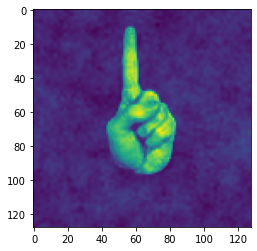

In [ ]:
from PIL import Image
im = Image.open(train_files[0])
plt.imshow(im);

In [ ]:
im_array = np.array(im)

In [ ]:
im_array.shape

(128, 128)

In [ ]:
X_train = np.zeros((len(train_files), 128, 128))
Y_train = np.zeros((len(train_files), 6))

In [ ]:
for i, trf in enumerate(train_files):
    im = Image.open(trf)
    X_train[i, :, :] = np.array(im)
    Y_train[i, int(trf[-6:-5])] = 1

In [ ]:
X_test = np.zeros((len(test_files), 128, 128))
Y_test = np.zeros((len(test_files), 6))

In [ ]:
for i, tsf in enumerate(test_files):
    im = Image.open(tsf)
    X_test[i, :, :] = np.array(im)
    Y_test[i, int(tsf[-6:-5])] = 1

In [ ]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 4000
number of test examples = 1000
X_train shape: (4000, 128, 128)
Y_train shape: (4000, 6)
X_test shape: (1000, 128, 128)
Y_test shape: (1000, 6)


### Train model

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.8.2'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=(1, 1), input_shape = (128, 128, 1), padding='same', activation = 'relu'))
model.add(MaxPool2D((8,8)))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(6, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 6)                 150534    
                                                                 
Total params: 225,030
Trainable params: 225,030
Non-trainable params: 0
__________________________________________________

#### Scale data

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)/255
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)/255

In [ ]:
X_train[0]

array([[[0.18431373],
        [0.18823529],
        [0.20392157],
        ...,
        [0.22352941],
        [0.22352941],
        [0.21960784]],

       [[0.17647059],
        [0.18823529],
        [0.20392157],
        ...,
        [0.22745098],
        [0.22352941],
        [0.22352941]],

       [[0.16862745],
        [0.18039216],
        [0.20784314],
        ...,
        [0.23137255],
        [0.23137255],
        [0.22745098]],

       ...,

       [[0.19215686],
        [0.18823529],
        [0.18039216],
        ...,
        [0.18823529],
        [0.18039216],
        [0.18039216]],

       [[0.18039216],
        [0.18039216],
        [0.18431373],
        ...,
        [0.17647059],
        [0.18039216],
        [0.18431373]],

       [[0.17647059],
        [0.17647059],
        [0.18431373],
        ...,
        [0.16862745],
        [0.18039216],
        [0.18431373]]])

In [ ]:
model.compile('SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x = X_train, y = Y_train, batch_size = 128, epochs = 10, validation_split=0.2)

Epoch 1/10
25/25 [==============================] - 13s 69ms/step - loss: 1.7752 - accuracy: 0.1834 - val_loss: 1.7577 - val_accuracy: 0.1562
Epoch 2/10
25/25 [==============================] - 2s 62ms/step - loss: 1.7380 - accuracy: 0.1894 - val_loss: 1.7156 - val_accuracy: 0.2575
Epoch 3/10
25/25 [==============================] - 1s 56ms/step - loss: 1.6902 - accuracy: 0.3609 - val_loss: 1.6570 - val_accuracy: 0.4925
Epoch 4/10
25/25 [==============================] - 1s 54ms/step - loss: 1.6132 - accuracy: 0.6769 - val_loss: 1.5549 - val_accuracy: 0.8687
Epoch 5/10
25/25 [==============================] - 1s 56ms/step - loss: 1.4764 - accuracy: 0.8819 - val_loss: 1.3656 - val_accuracy: 0.9062
Epoch 6/10
25/25 [==============================] - 1s 55ms/step - loss: 1.2331 - accuracy: 0.8994 - val_loss: 1.0657 - val_accuracy: 0.9237
Epoch 7/10
25/25 [==============================] - 1s 59ms/step - loss: 0.8898 - accuracy: 0.9200 - val_loss: 0.6834 - val_accuracy: 0.9375
Epoch 8/10
2

In [ ]:
Y_pred_test = model.predict(X_test)

#### Check model perfomance by looking at confusion matrix and classification report on the test data

In [ ]:
from sklearn import metrics

In [ ]:
#print(metrics.confusion_matrix(np.argmax(Y_test, axis=1), Y_pred_test))

In [ ]:
#print(metrics.classification_report(np.argmax(Y_test, axis=1), Y_pred_test, digits=3))

#### Convert and save model

In [ ]:
cnn_model = model

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)

In [ ]:
tflite_model = converter.convert()
open("converted_model_fingers_cnn.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp7dz1dp6y/assets


902592

In [ ]:
model.save("FingerCount.h5")

ValueError: ignored

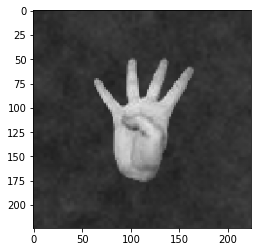

In [ ]:
from keras.preprocessing import image
img2fing = image.load_img("/content/c861b86a-9635-423f-9ccf-8bde31bfde56_4R.png",target_size=(224,224))
img2fing = np.asarray(img2fing)
plt.imshow(img2fing)
img2fing = np.expand_dims(img2fing, axis=0)
from keras.models import load_model
saved_model = load_model("FingerCount.h5")
output = saved_model.predict(img2fing)
if output[0][0] > output[0][1]:
    print("0")
elif output[0][1] > output[0][2]:
    print('1')
elif output[0][2] > output[0][3]:
    print('2')
elif output[0][3] > output[0][4]:
    print('3')
elif output[0][4] > output[0][5]:
    print('4')
elif output[0][5] > output[0][6]:
    print('5')
